In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report #正确率，召回率等做评估用
from sklearn import preprocessing #标准化
#是否标准化
scale = False

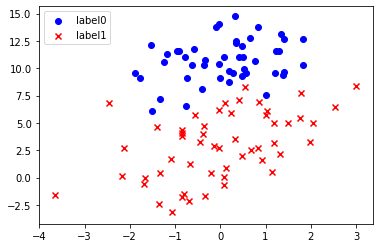

In [2]:
data = np.genfromtxt('LR-testSet.csv',delimiter = ',')
x_data = data[:,:2]
y_data = data[:,2]

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0 = plt.scatter(x0,y0,c='b',marker = 'o')
    scatter1 = plt.scatter(x1,y1,c='r',marker = 'x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
    
plot()
plt.show()

In [3]:
#数据预处理，添加偏置项
x_data = data[:,:2]
y_data = data[:,2,np.newaxis]
X_data = np.concatenate((np.ones((100,1)),x_data),axis=1)

In [4]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))
def cost(xMat,yMat,ws):
    left = np.multiply(yMat,np.log(sigmoid(xMat * ws)))
    right = np.multiply(1-yMat,np.log(1 - sigmoid(xMat * ws)))
    return np.sum(left+right) / -(len(xMat))
def gradAscent(xArr,yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    lr = 0.001
    epochs = 10000
    costList = []
    #计算数据行列数
    #行代表数据个数，列代表权值个数
    m,n = np.shape(xMat)
    #初始化权值
    ws = np.mat(np.ones((n,1)))
    for i in range(epochs+1):
        h = sigmoid(xMat * ws)
        #计算误差
        ws_grad = xMat.T*(h - yMat)/m
        ws = ws - lr*ws_grad

        if i%50 == 0:
                costList.append(cost(xMat,yMat,ws))
                    
    return ws,costList

In [5]:
ws,costList = gradAscent(X_data,y_data)
print(ws)

[[ 2.05836354]
 [ 0.3510579 ]
 [-0.36341304]]


[[1.79996827]
 [8.56198565]]


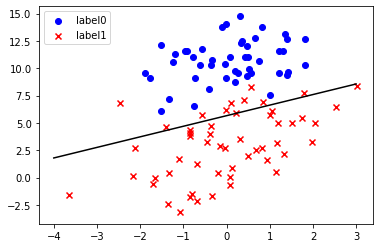

In [6]:
if scale == False:
    plot()
    x_test = [[-4],[3]]
    y_test = (-ws[0] - x_test*ws[1]) / ws[2]
    print(y_test)
    plt.plot(x_test,y_test,'k')
    plt.show()

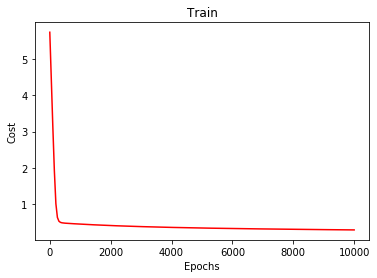

In [7]:
#画图 cost值的变化
x = np.linspace(0,10000,201)
plt.plot(x,costList,c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [8]:
def predict(x_data,ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x>0.5 else 0 for x in sigmoid(xMat*ws)]
predictions = predict(X_data,ws)
print(classification_report(y_data,predictions))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        47
         1.0       1.00      0.81      0.90        53

    accuracy                           0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100

